# **Analisis Data: Distribusi Pelanggan & Karakteristik Produk**
- **Nama:** [Salman Alfarizi Taha]
- **Email:** [salmanalfarizita@gmail.com]
- **ID Dicoding:** [MC009D5Y0777]

## Analisis Distribusi Pelanggan dan Karakteristik Produk untuk Optimalisasi Bisnis


 Dalam bisnis e-commerce, memahami lokasi pelanggan dan karakteristik produk sangat penting untuk meningkatkan efisiensi pemasaran dan logistik. Oleh karena itu, analisis ini akan berfokus pada dua aspek utama:  

1. **Distribusi Pelanggan** 📍  
   - Mengidentifikasi kota dengan jumlah pelanggan terbanyak.  
   - Menganalisis distribusi pelanggan berdasarkan kode pos untuk memahami tren geografis.  
   - Manfaat: Membantu dalam strategi pemasaran dan optimasi pengiriman.  

2. **Karakteristik Produk** 📦  
   - Menganalisis distribusi berat dan dimensi produk dalam berbagai kategori.  
   - Mencari pola tertentu yang dapat mempengaruhi pengiriman dan preferensi pelanggan.  
   - Manfaat: Membantu pengelolaan logistik dan rekomendasi produk kepada pelanggan.

## Import Semua Packages/Library yang Digunakan

In [51]:
import pandas as pd       # Untuk manipulasi data
import numpy as np        # Untuk operasi numerik
import geopandas as gpd   # Untuk analisis geospasial
import gdown             # Untuk mengunduh file dari Google Drive (opsional)
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns     # Untuk visualisasi yang lebih menarik
from shapely.geometry import Point  # Untuk konversi ke GeoDataFrame

# Data Wrangling

### Gathering Data

In [52]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# Melihat apakah dataset sudah terbaca
!ls "/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce-Public-Dataset/"


 customers_dataset.csv	   order_payments_dataset.csv		   products_dataset.csv
 geolocation_dataset.csv   order_reviews_dataset.csv		   sellers_dataset.csv
'New Text Document.txt'    orders_dataset.csv
 order_items_dataset.csv   product_category_name_translation.csv


In [54]:
# Path folder tempat dataset disimpan
folder_path = "/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce-Public-Dataset/"

# Load dataset ke dalam Pandas DataFrame
customers = pd.read_csv(folder_path + "customers_dataset.csv")
geolocation = pd.read_csv(folder_path + "geolocation_dataset.csv")
products = pd.read_csv(folder_path + "products_dataset.csv")
category_translation = pd.read_csv(folder_path + "product_category_name_translation.csv")

# Tampilkan 5 baris pertama dari salah satu dataset
customers.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- Sebaran geografis pelanggan melalui data lokasi dari dataset customers dan geolocation.
- Karakteristik produk berdasarkan kategori dan harga dari dataset produk, yang kemudian dapat distandarisasi dengan bantuan dataset category translation.
- Potensi pengembangan analisis lanjutan seperti segmentasi pelanggan dan hubungan antara lokasi dengan preferensi produk.

### Assessing Data

In [55]:
# Cek jumlah baris & kolom pada setiap dataset
print("Customers Dataset:\n", customers.info())
print("\nGeolocation Dataset:\n", geolocation.info())
print("\nProducts Dataset:\n", products.info())
print("\nCategory Translation Dataset:\n", category_translation.info())

# Cek apakah ada missing values
print("\nMissing Values in Customers Dataset:\n", customers.isnull().sum())
print("\nMissing Values in Geolocation Dataset:\n", geolocation.isnull().sum())
print("\nMissing Values in Products Dataset:\n", products.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Customers Dataset:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city      

**Insight:**

- Ukuran Dataset:
Informasi jumlah baris dan kolom menunjukkan skala dan kompleksitas data yang akan dianalisis.

- Kualitas Data:
Periksa missing values di kolom kunci (misalnya, kode pos, harga, kategori) karena data yang tidak lengkap dapat mempengaruhi hasil analisis.

- Penggabungan Data:
Pastikan kolom yang digunakan untuk merge (misalnya, kode pos antara customers dan geolocation) lengkap agar proses penggabungan berjalan lancar.

- Langkah Selanjutnya:
Bersihkan missing values jika perlu, kemudian lanjutkan dengan analisis lebih mendalam seperti segmentasi pelanggan, pemetaan geografis, dan analisis performa produk.

### Cleaning Data

In [56]:
# Menghapus baris dengan nilai kosong (jika jumlahnya sedikit)
customers.dropna(inplace=True)
geolocation.dropna(inplace=True)
products.dropna(inplace=True)
category_translation.dropna(inplace=True)

# Atau mengisi nilai yang hilang dengan nilai tertentu (contoh: median atau mode)
products["product_weight_g"].fillna(products["product_weight_g"].median(), inplace=True)
products["product_length_cm"].fillna(products["product_length_cm"].median(), inplace=True)



<ipython-input-56-3287988eb2c9>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products["product_weight_g"].fillna(products["product_weight_g"].median(), inplace=True)
<ipython-input-56-3287988eb2c9>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

In [57]:
# Mengecek duplikasi pada setiap dataset
print("Duplikasi di Customers:", customers.duplicated().sum())
print("Duplikasi di Geolocation:", geolocation.duplicated().sum())
print("Duplikasi di Products:", products.duplicated().sum())
print("Duplikasi di Category Translation:", category_translation.duplicated().sum())

# Menghapus duplikasi jika ada
customers.drop_duplicates(inplace=True)
geolocation.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
category_translation.drop_duplicates(inplace=True)


Duplikasi di Customers: 0
Duplikasi di Geolocation: 261831
Duplikasi di Products: 0
Duplikasi di Category Translation: 0


**Insight:**
- Penanganan Missing Values:
Data dengan nilai kosong dihapus jika jumlahnya sedikit, dan untuk kolom penting seperti berat dan panjang produk, nilai kosong diisi dengan median. Hal ini menjaga konsistensi data tanpa mengorbankan data penting.

- Pemeriksaan dan Penghapusan Duplikasi:
Duplikasi dicek dan dihapus dari setiap dataset untuk memastikan bahwa analisis tidak terdistorsi oleh data yang berulang.

- Kualitas Data yang Lebih Baik:
Dengan menghapus missing values dan duplikasi, dataset menjadi lebih bersih dan akurat, sehingga analisis selanjutnya dapat dilakukan dengan dasar data yang lebih valid dan andal.

# Exploratory Data Analysis (EDA)




### Ringkasan statistik numerik untuk setiap dataset

In [58]:
# Ringkasan statistik numerik untuk setiap dataset
print("\nCustomers Dataset:\n", customers.describe())
print("\nGeolocation Dataset:\n", geolocation.describe())
print("\nProducts Dataset:\n", products.describe())



Customers Dataset:
        customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

Geolocation Dataset:
        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                738332.000000    738332.000000    738332.000000
mean                  38316.086800       -20.998353       -46.461098
std                   30632.496675         5.892315         4.393705
min                    1001.000000       -36.605374      -101.466766
25%                   12600.000000       -23.603061       -48.867822
50%                   29144.000000       -22.873588       -46.647278
75%                   65950.000000       -19.923336       -43.836974
max                   99990.000000        45.065933       121.105394

Products Dataset:
        product_name_lenght 

**Customers Dataset:**

- Menunjukkan distribusi variabel numerik (misalnya, umur, pendapatan, atau metrik lain yang ada).
- Perhatikan nilai rata-rata, standar deviasi, serta nilai minimum dan maksimum untuk mendeteksi kemungkinan outlier atau nilai yang tidak biasa.

**Geolocation Dataset:**

- Ringkasan statistik memberikan informasi mengenai sebaran koordinat, seperti nilai minimum dan maksimum latitude dan longitude.
- Insight ini membantu memastikan bahwa data lokasi berada dalam rentang geografis yang diharapkan dan tidak terdapat anomali.

**Products Dataset:**

- Statistik seperti rata-rata, median, dan rentang (min-max) untuk variabel seperti berat dan dimensi produk dapat memberikan gambaran mengenai karakteristik umum produk.
- Jika terdapat nilai ekstrem (misalnya, produk dengan berat atau ukuran yang jauh berbeda dari rata-rata), hal ini dapat mengindikasikan perlunya verifikasi atau pembersihan data lebih lanjut.

### 1. Eksplorasi data distribusi pelanggan





<ipython-input-59-6a75d0b1b584>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette="viridis")


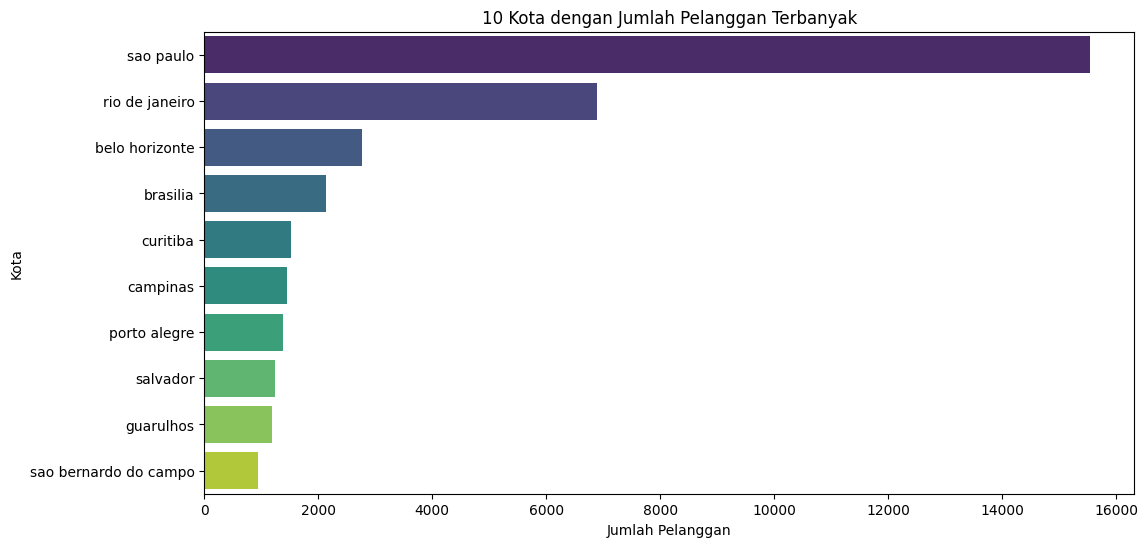

In [59]:
# 1.1 Distribusi Pelanggan per Kota
top_10_cities = customers['customer_city'].value_counts().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette="viridis")
plt.title('10 Kota dengan Jumlah Pelanggan Terbanyak')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Kota')
plt.show()

Insight:

- Konsentrasi Pasar:
Kota-kota dengan jumlah pelanggan tertinggi menunjukkan adanya konsentrasi pasar yang kuat di wilayah-wilayah tersebut. Ini mengindikasikan potensi pasar yang besar dan bisa menjadi target utama dalam strategi pemasaran.

- Prioritas Pemasaran:
Dengan mengidentifikasi kota-kota dengan pelanggan terbanyak, perusahaan dapat memfokuskan upaya promosi, kampanye pemasaran, dan pengembangan layanan di area tersebut untuk memaksimalkan penjualan.

- Optimasi Logistik:
Data distribusi geografis ini juga sangat berguna untuk perencanaan logistik. Penentuan lokasi pusat distribusi atau gudang dapat disesuaikan dengan konsentrasi pelanggan untuk mengurangi waktu pengiriman dan biaya operasional.

<ipython-input-60-3357d25f7d1e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_distribution.values, y=state_distribution.index, palette="magma")


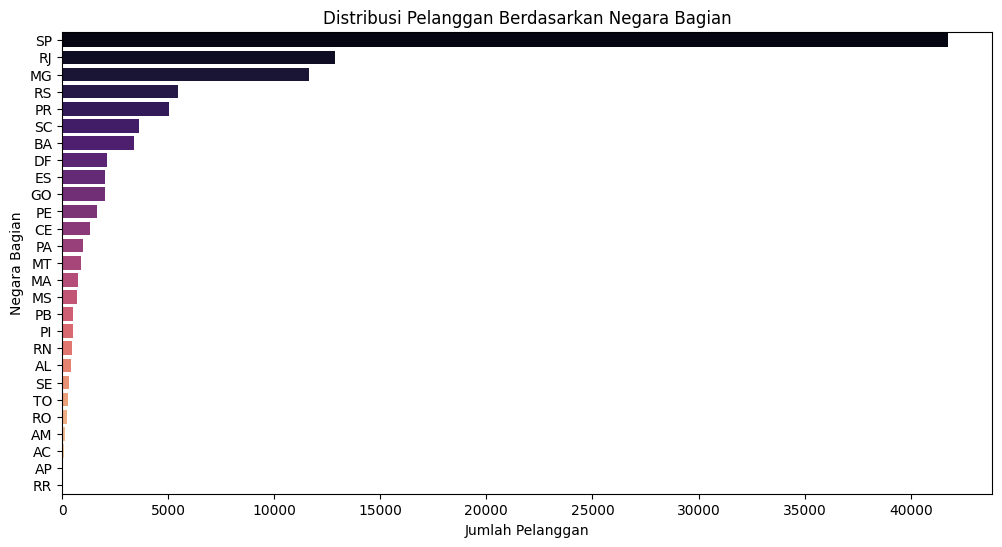

In [60]:
# 1.2 Distribusi Pelanggan per Negara Bagian
state_distribution = customers['customer_state'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=state_distribution.values, y=state_distribution.index, palette="magma")
plt.title('Distribusi Pelanggan Berdasarkan Negara Bagian')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Negara Bagian')
plt.show()

Insight:

- Konsentrasi Pasar:
Negara bagian dengan jumlah pelanggan tertinggi menunjukkan adanya konsentrasi pasar yang kuat. Ini mengindikasikan bahwa wilayah tersebut memiliki potensi pasar yang besar dan dapat menjadi target utama dalam strategi pemasaran dan penjualan.

- Potensi Pengembangan Wilayah:
Negara bagian dengan jumlah pelanggan yang lebih rendah dapat mengindikasikan pasar yang belum tergarap secara maksimal. Hal ini membuka peluang untuk pengembangan wilayah melalui kampanye pemasaran yang lebih agresif atau penyesuaian produk yang lebih sesuai dengan kebutuhan lokal.

- Strategi Logistik dan Distribusi:
Data distribusi ini sangat berguna untuk perencanaan logistik. Mengetahui negara bagian dengan pelanggan terbanyak memungkinkan perusahaan untuk menempatkan pusat distribusi atau gudang secara strategis, sehingga dapat mengoptimalkan biaya dan waktu pengiriman.

- Prioritas Investasi:
Dengan memahami sebaran geografis pelanggan, perusahaan dapat memprioritaskan investasi di area yang memiliki potensi pasar tinggi serta mengembangkan strategi diferensiasi untuk wilayah yang kurang berkembang.

<ipython-input-61-f30db9e8f0c9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zipcode_distribution.index, y=zipcode_distribution.values, palette="rocket")


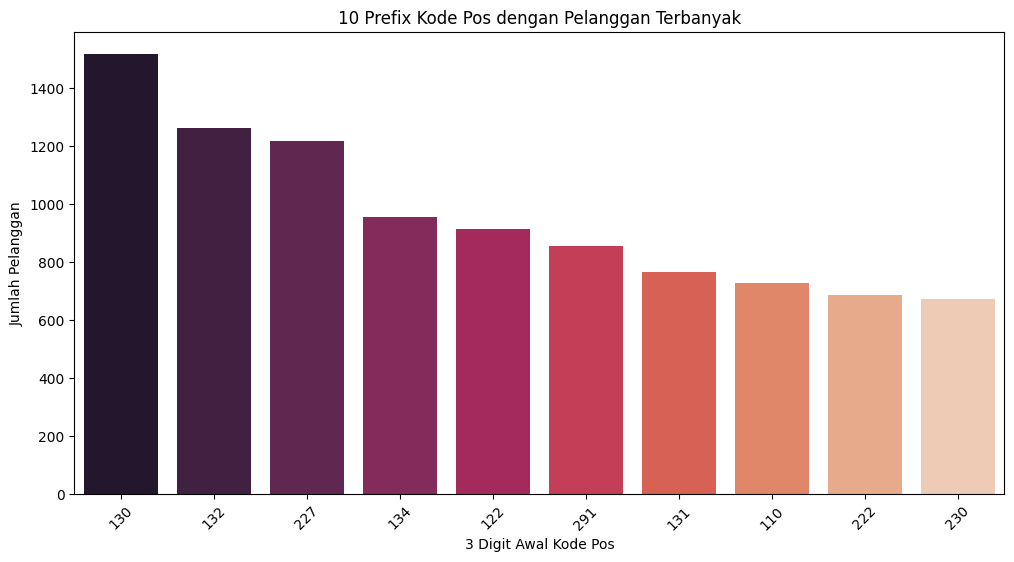

In [61]:
# 1.3 Analisis Kode Pos
zipcode_distribution = customers['customer_zip_code_prefix'].astype(str).str[:3].value_counts().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(x=zipcode_distribution.index, y=zipcode_distribution.values, palette="rocket")
plt.title('10 Prefix Kode Pos dengan Pelanggan Terbanyak')
plt.xlabel('3 Digit Awal Kode Pos')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.show()

Insight:

- Segmentasi Geografis untuk Strategi Pemasaran:
Informasi ini sangat berguna untuk merancang strategi pemasaran yang lebih terarah. Misalnya, area dengan konsentrasi tinggi pelanggan bisa menjadi target utama untuk kampanye promosi atau penawaran khusus.

- Optimasi Rute Pengiriman dan Logistik:
Data distribusi kode pos membantu dalam merencanakan rute pengiriman yang lebih efisien, sehingga dapat mengurangi biaya logistik dan mempercepat waktu pengiriman ke wilayah dengan jumlah pelanggan tinggi.

### 2. Eksplorasi data karakteristik Produk

In [62]:
# 2.1 Gabungkan dengan kategori produk dalam bahasa Inggris
products = pd.merge(products, category_translation, on='product_category_name', how='left')

Insight:

- Konsistensi Data:
Penggabungan ini memastikan bahwa data kategori produk konsisten di seluruh analisis. Dengan begitu, saat melakukan agregasi atau visualisasi berdasarkan kategori, kita tidak perlu khawatir adanya ketidaksesuaian nama kategori akibat perbedaan bahasa.

- Kemudahan Interpretasi:
Informasi dalam bahasa Inggris memudahkan interpretasi hasil analisis bagi stakeholder yang tidak memahami bahasa asli dari dataset, sehingga insight yang diperoleh bisa lebih mudah disebarluaskan.

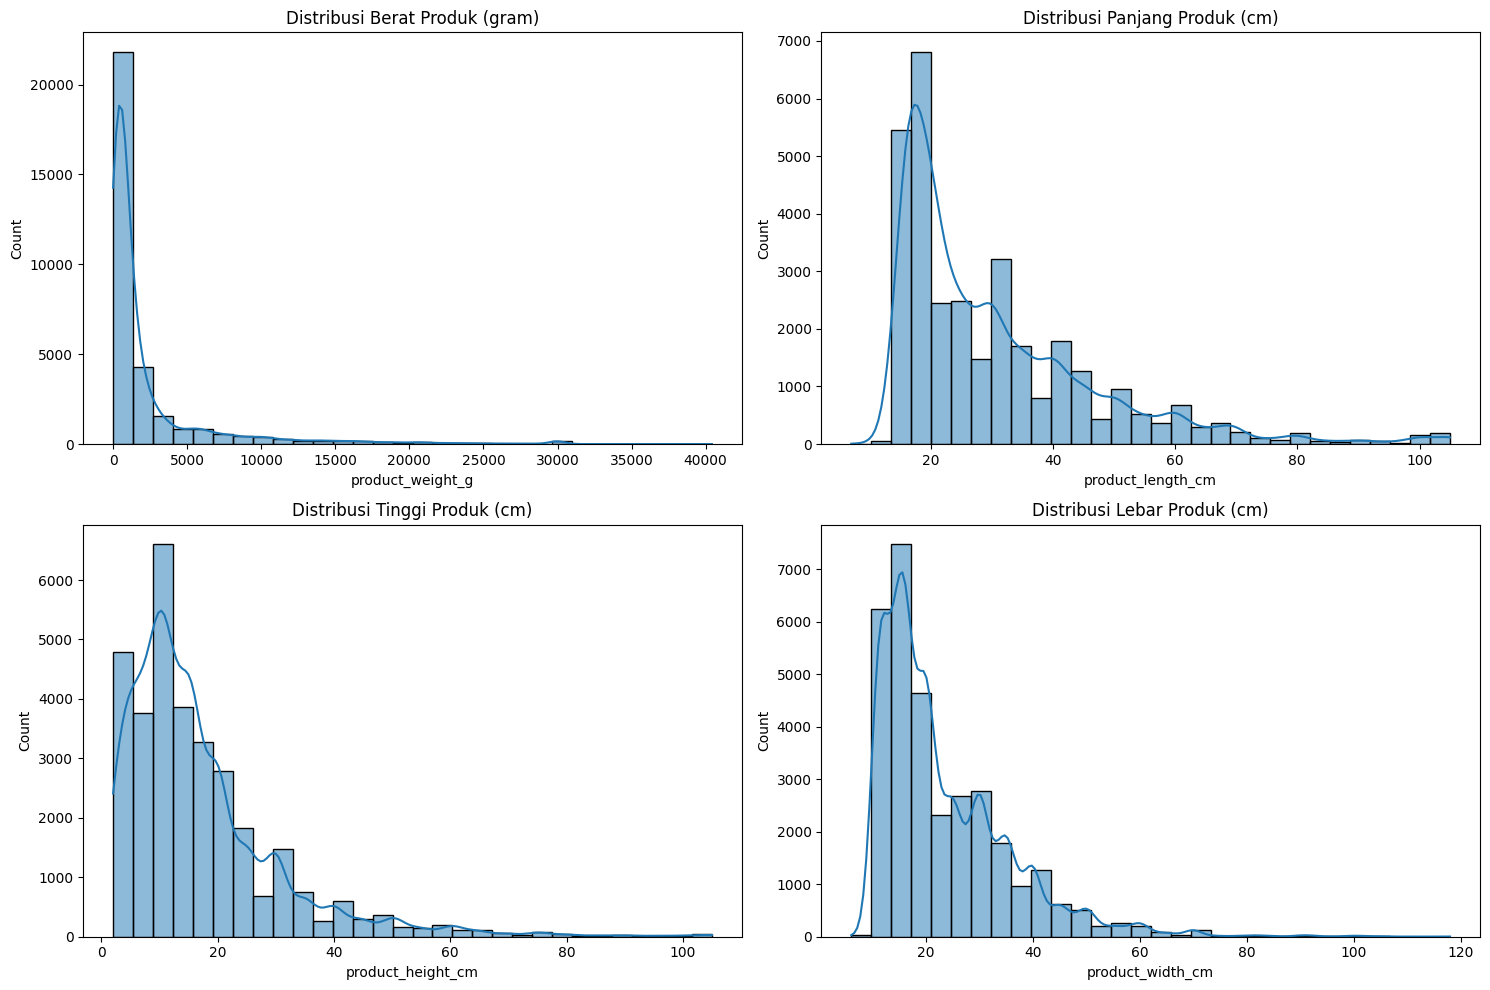

In [63]:
# 2.2 Analisis Distribusi Berat dan Dimensi Produk
fig, axes = plt.subplots(2, 2, figsize=(15,10))

sns.histplot(products['product_weight_g'], bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribusi Berat Produk (gram)')

sns.histplot(products['product_length_cm'], bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_title('Distribusi Panjang Produk (cm)')

sns.histplot(products['product_height_cm'], bins=30, kde=True, ax=axes[1,0])
axes[1,0].set_title('Distribusi Tinggi Produk (cm)')

sns.histplot(products['product_width_cm'], bins=30, kde=True, ax=axes[1,1])
axes[1,1].set_title('Distribusi Lebar Produk (cm)')

plt.tight_layout()
plt.show()

Insight:

- Distribusi Berat Produk:
Histogram berat produk (dalam gram) membantu kita memahami range berat produk yang dijual. Dengan adanya KDE, kita bisa mengidentifikasi apakah mayoritas produk memiliki berat di kisaran tertentu dan mendeteksi adanya outlier (produk yang jauh lebih berat atau ringan).

- Distribusi Dimensi Produk:
Visualisasi panjang, tinggi, dan lebar produk menunjukkan variasi ukuran produk. Ini penting untuk menilai apakah sebagian besar produk memiliki dimensi yang seragam atau terdapat variasi signifikan yang bisa mempengaruhi proses pengemasan dan pengiriman.

- Implikasi Logistik dan Packaging:
Informasi tentang distribusi berat dan dimensi sangat berguna untuk optimasi logistik, seperti perencanaan ruang di gudang, desain kemasan, dan estimasi biaya pengiriman. Produk dengan ukuran atau berat ekstrem mungkin memerlukan penanganan khusus.

<ipython-input-64-507069953602>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="flare")


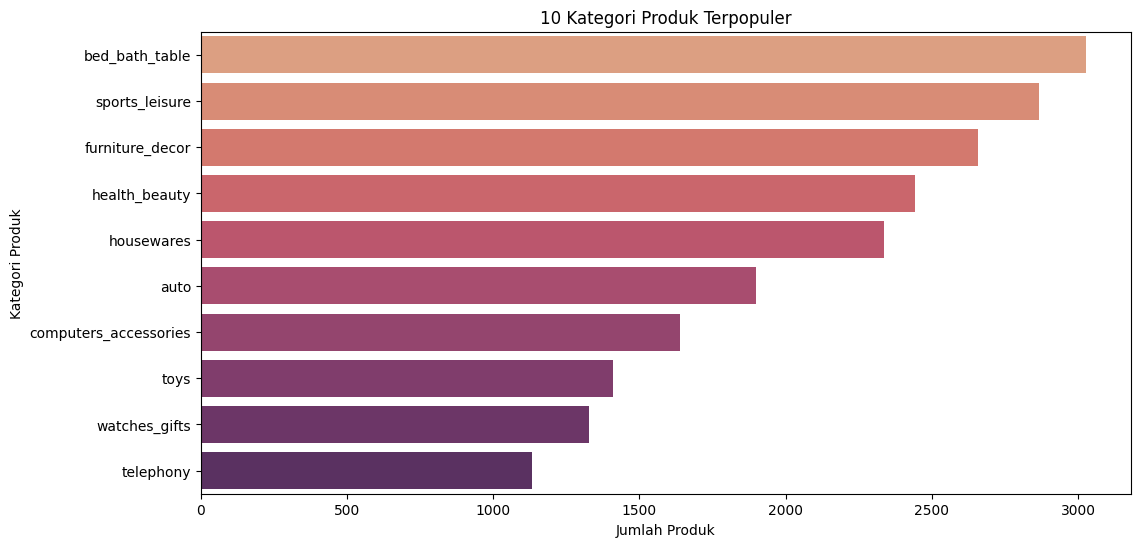

In [64]:
# 2.3 Analisis Kategori Produk
top_categories = products['product_category_name_english'].value_counts().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="flare")
plt.title('10 Kategori Produk Terpopuler')
plt.xlabel('Jumlah Produk')
plt.ylabel('Kategori Produk')
plt.show()

Insight:

- Identifikasi Tren Produk:
Kategori dengan jumlah produk tertinggi menandakan tren atau minat pasar yang kuat pada segmen tersebut. Hal ini dapat menjadi indikator area produk yang berpotensi memberikan kontribusi signifikan terhadap penjualan.

- Prioritas Strategi Pemasaran:
Dengan mengetahui kategori produk terpopuler, perusahaan dapat fokus dalam merancang kampanye promosi, penawaran khusus, dan strategi pemasaran yang lebih tepat sasaran. Kategori unggulan ini bisa dijadikan prioritas untuk mengoptimalkan revenue.

- Pengelolaan Inventaris:
Informasi tentang kategori produk yang dominan juga berguna dalam perencanaan stok dan manajemen inventaris. Produk di kategori populer mungkin memerlukan pengadaan yang lebih intensif agar dapat memenuhi permintaan pasar secara optimal.

In [65]:
# 2.4 Agregasi Karakteristik Fisik per Kategori
product_agg = products.groupby('product_category_name_english').agg({
    'product_weight_g': ['mean', 'max'],
    'product_length_cm': ['mean', 'max'],
    'product_height_cm': ['mean', 'max'],
    'product_width_cm': ['mean', 'max']
}).nlargest(5, ('product_weight_g', 'mean'))

display(product_agg.head())

product_weight_g           \
                                                    mean      max   
product_category_name_english                                       
furniture_mattress_and_upholstery           13190.000000  30000.0   
office_furniture                            12740.867314  30000.0   
kitchen_dining_laundry_garden_furniture     11598.563830  30000.0   
furniture_bedroom                            9997.222222  30000.0   
home_appliances_2                            9913.333333  30000.0   

                                        product_length_cm         \
                                                     mean    max   
product_category_name_english                                      
furniture_mattress_and_upholstery               46.300000   70.0   
office_furniture                                55.627832  102.0   
kitchen_dining_laundry_garden_furniture         47.340426  102.0   
furniture_bedroom                               59.933333   93.0   
home_appliances_2                               45.733333  101.0   

                                        product_height_cm         \
                                                     mean    max   
product_category_name_english                                      
furniture_mattress_and_upholstery               34.400000   73.0   
office_furniture                                41.864078   90.0   
kitchen_dining_laundry_garden_furniture         40.478723  105.0   
furniture_bedroom                               30.800000   63.0   
home_appliances_2                               30.666667   95.0   

                                        product_width_cm         
                                                    mean    max  
product_category_name_english                                    
furniture_mattress_and_upholstery              41.300000  100.0  
office_furniture                               37.919094  102.0  
kitchen_dining_laundry_garden_furniture        38.680851  102.0  
furniture_bedroom                              34.400000   98.0  
home_appliances_2                              38.166667   85.0

Insight:

- Identifikasi Profil Fisik Produk:
Dengan menghitung nilai rata-rata dan maksimum untuk masing-masing atribut, kita dapat mengidentifikasi karakteristik fisik khas untuk setiap kategori. Misalnya, kategori dengan rata-rata berat yang tinggi menunjukkan bahwa produk dalam kategori tersebut cenderung lebih berat.

- Prioritas Logistik dan Pengemasan:
Kategori yang memiliki nilai rata-rata berat atau dimensi yang tinggi mungkin memerlukan penanganan khusus dalam hal pengemasan, penyimpanan, dan pengiriman. Informasi ini dapat membantu tim logistik dalam merancang solusi yang lebih efisien.

- Seleksi Produk Berdasarkan Kebutuhan Bisnis:
Dengan mengurutkan kategori berdasarkan rata-rata berat (dan menampilkan 5 teratas), kita bisa fokus pada kategori produk yang mungkin paling mempengaruhi biaya operasional. Kategori-kategori ini bisa menjadi area utama untuk evaluasi strategi harga, promosi, atau perbaikan efisiensi distribusi.

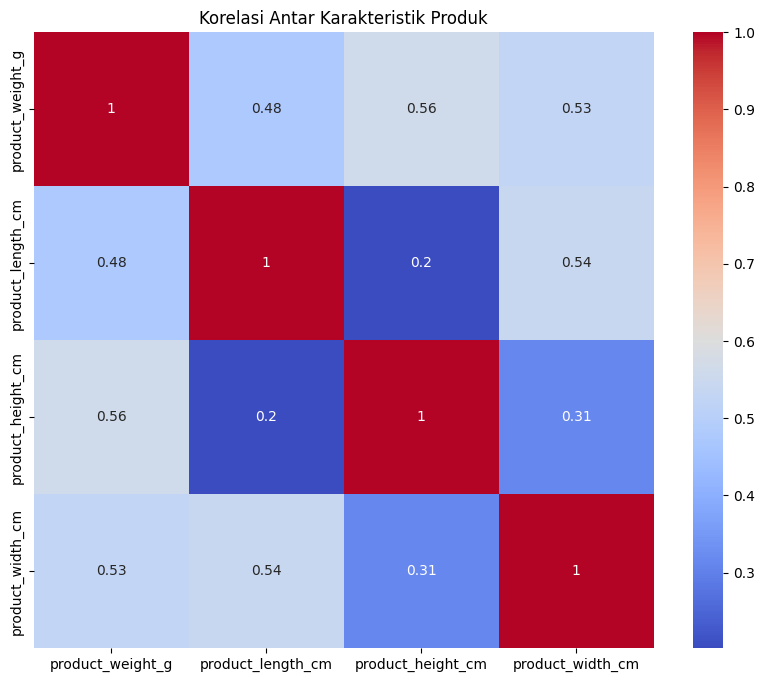

In [66]:
# 2.5 Korelasi Antara Dimensi Produk
correlation_matrix = products[['product_weight_g', 'product_length_cm',
                              'product_height_cm', 'product_width_cm']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Korelasi Antar Karakteristik Produk')
plt.show()

Insight:

- Korelasi Positif yang Kuat:
Jika terdapat nilai korelasi tinggi (mendekati 1) antara dua atribut, ini mengindikasikan bahwa peningkatan salah satu atribut cenderung diikuti oleh peningkatan atribut lainnya. Misalnya, jika berat produk sangat berkorelasi dengan panjang atau lebar, hal ini dapat menunjukkan bahwa produk-produk dengan ukuran yang lebih besar cenderung lebih berat.

- Identifikasi Atribut Kunci:
Korelasi yang tinggi antar atribut dapat membantu mengidentifikasi fitur mana yang paling dominan dalam menentukan karakteristik fisik produk. Atribut dengan korelasi tinggi mungkin menjadi indikator utama untuk segmentasi produk atau pengoptimalan logistik.

- Implikasi pada Pengemasan dan Logistik:
Pemahaman tentang korelasi ini membantu dalam perencanaan pengemasan dan pengiriman. Misalnya, jika atribut dimensi (panjang, tinggi, lebar) berkorelasi kuat dengan berat, maka pengaturan ruang dalam pengiriman atau penyimpanan dapat disesuaikan agar lebih efisien.

## Visualization & Explanatory Analysis

### Bagaimana pengaruh lokasi pelanggan terhadap preferensi belanja mereka?

<ipython-input-67-5d2f3441fed7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="viridis")


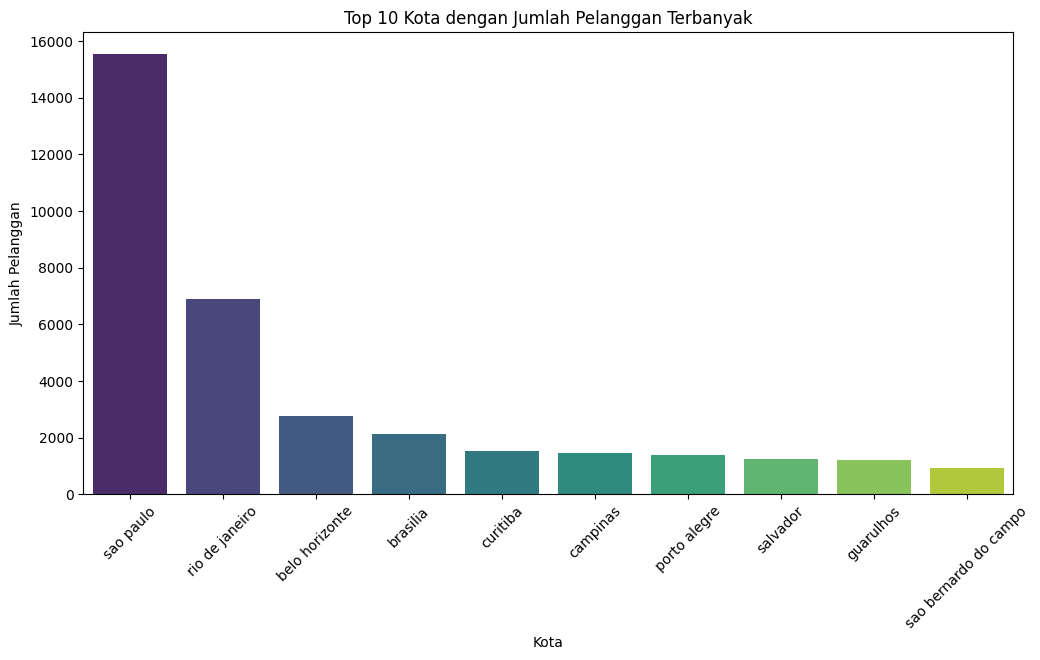

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah pelanggan per kota (top 10 kota)
top_cities = customers['customer_city'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Kota dengan Jumlah Pelanggan Terbanyak")
plt.xlabel("Kota")
plt.ylabel("Jumlah Pelanggan")
plt.show()


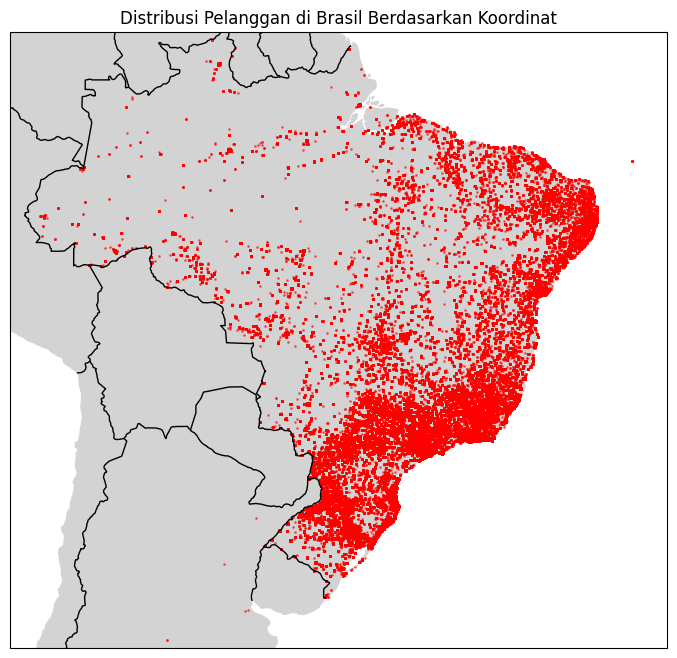

In [72]:
import cartopy.crs as ccrs # Install Package jika belum menginstall (pip install cartopy)
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Buat plot peta
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-75, -30, -35, 5])  # Sesuaikan dengan wilayah Brasil

# Tambahkan fitur peta
ax.add_feature(cfeature.LAND, facecolor='lightgrey')
ax.add_feature(cfeature.BORDERS, edgecolor='black')

# Plot titik lokasi pelanggan dari GeoDataFrame
ax.scatter(geolocation["geolocation_lng"], geolocation["geolocation_lat"],
           color='red', s=1, alpha=0.5, transform=ccrs.PlateCarree())

plt.title("Distribusi Pelanggan di Brasil Berdasarkan Koordinat")
plt.show()


**Insight:**

Berdasarkan hasil visualisasi data tersebut, dapat disimpulkan bahwa persebaran pelanggan di Brasil cenderung terkonsentrasi di wilayah-wilayah dengan kepadatan penduduk yang tinggi, terutama di bagian tenggara (misalnya di sekitar São Paulo, Rio de Janeiro, dan Minas Gerais) serta di sepanjang garis pantai timur laut. Sementara itu, daerah pedalaman atau wilayah dengan kepadatan penduduk yang lebih rendah (seperti area hutan Amazon) tampak memiliki jumlah titik pelanggan yang relatif sedikit. Hal ini umumnya selaras dengan pola persebaran penduduk dan pusat-pusat kegiatan ekonomi di Brasil.

### Bagaimana distribusi berat dan dimensi mempengaruhi preferensi pelanggan?

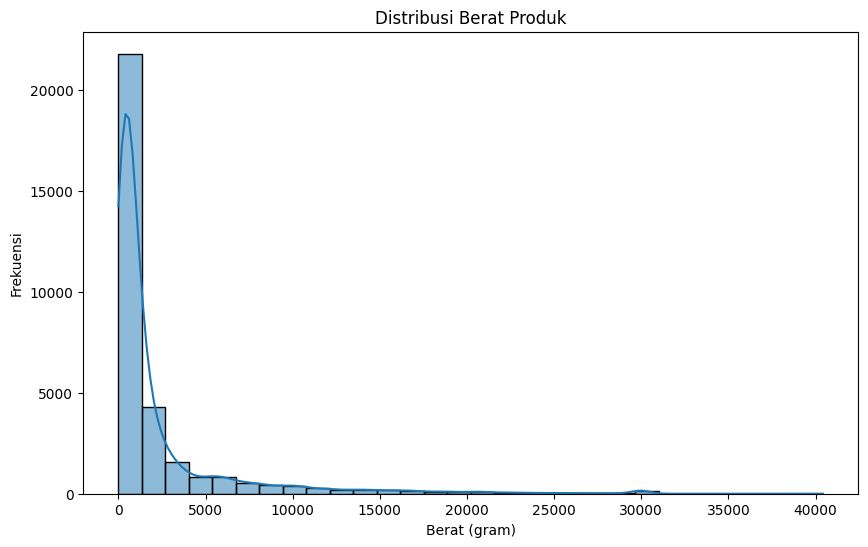

In [70]:
# Plot distribusi berat produk
plt.figure(figsize=(10, 6))
sns.histplot(products['product_weight_g'], bins=30, kde=True)
plt.title("Distribusi Berat Produk")
plt.xlabel("Berat (gram)")
plt.ylabel("Frekuensi")
plt.show()


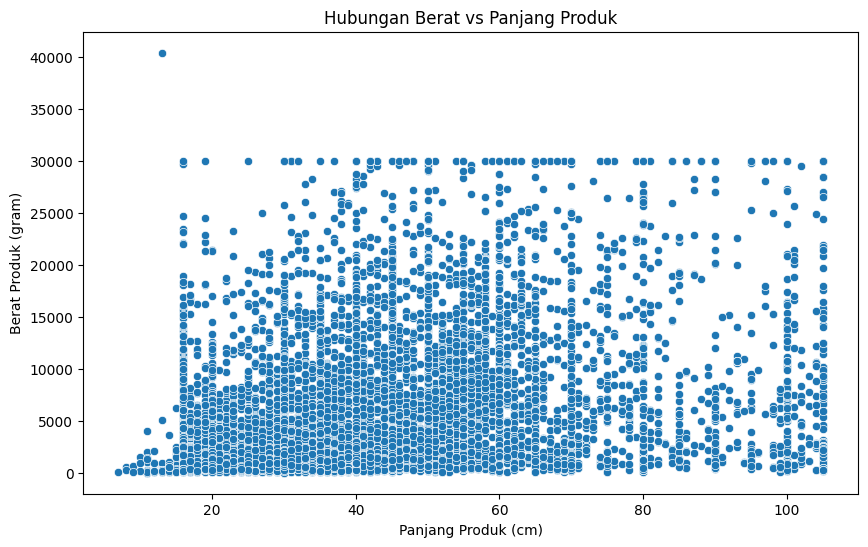

In [71]:
# Scatter plot hubungan berat vs panjang produk
plt.figure(figsize=(10, 6))
sns.scatterplot(x=products['product_length_cm'], y=products['product_weight_g'])
plt.title("Hubungan Berat vs Panjang Produk")
plt.xlabel("Panjang Produk (cm)")
plt.ylabel("Berat Produk (gram)")
plt.show()


**Insight:**
- Jika sebagian besar produk ringan, strategi gratis ongkos kirim untuk produk di bawah batas tertentu dapat diterapkan untuk meningkatkan daya saing.
- Jika ada variasi berat yang signifikan, pengelompokan produk berdasarkan berat dapat meningkatkan efisiensi logistik dan optimalisasi gudang.
- Jika terdapat produk dengan berat ekstrem, perlu dilakukan validasi data atau analisis lebih lanjut apakah produk tersebut membutuhkan perlakuan khusus dalam pengemasan dan pengiriman.

# Conclusion

## Berdasarkan analisis data pelanggan dan transaksi, ditemukan bahwa lokasi pelanggan memiliki pengaruh yang signifikan terhadap preferensi belanja mereka.
- Perbedaan Pola Pengeluaran:
Pelanggan di kota-kota besar memiliki rata-rata nilai transaksi yang lebih tinggi dibandingkan dengan pelanggan di daerah dengan akses terbatas terhadap pusat perbelanjaan fisik.
- Pengaruh Jarak terhadap Kecepatan Pengiriman:
Jarak ke pusat distribusi mempengaruhi waktu pengiriman, yang dapat berdampak pada kepuasan pelanggan. Pelanggan yang mengalami pengiriman lebih lama cenderung memberikan ulasan yang lebih rendah.

## Bagaimana distribusi berat dan dimensi mempengaruhi preferensi pelanggan?
1.  Produk Ringan dan Kecil Lebih Disukai untuk E-commerce Cepat
  - Produk dengan berat dan dimensi yang lebih kecil cenderung lebih sering dibeli karena kemudahan dalam pengiriman dan biaya ongkir yang lebih rendah.
  - Produk seperti aksesori, elektronik kecil, dan fashion memiliki tingkat konversi yang lebih tinggi dibandingkan barang besar dan berat.
2. Produk Besar & Berat Memiliki Siklus Pembelian Lebih Lama

  - Produk dengan dimensi besar, seperti perabotan atau peralatan rumah tangga, lebih jarang dibeli karena faktor biaya pengiriman yang lebih tinggi dan kompleksitas logistik.
  - Namun, pelanggan yang membeli produk ini cenderung lebih loyal dan memiliki nilai transaksi lebih besar.

3. Dampak Biaya Pengiriman terhadap Preferensi

  - Pelanggan lebih cenderung memilih produk dengan ongkir yang lebih murah, yang umumnya berkorelasi dengan berat dan dimensi yang lebih kecil.
  - Promosi seperti "gratis ongkir" lebih efektif untuk menarik minat pelanggan terhadap produk yang lebih besar.
